## Handwritten Digit Classification

In [3]:
import torch

import numpy as np
import helper

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
## Download the dataset
from torchvision import datasets, transforms

# Define atransform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


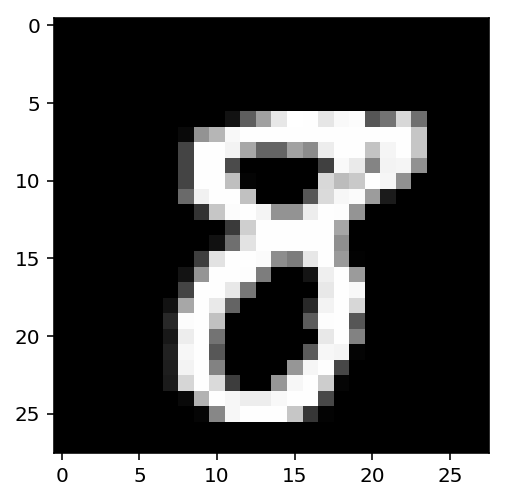

In [8]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [9]:
def flatten_images(images):
    flat_imgs = images.view(images.shape[0], 1, -1)
    return flat_imgs

In [11]:
from torch import nn
import torch.nn.functional as F

## Method 1
Below mentioned is the first way to build a neural network.

We first create a class, and define the network structure and a forward pass function in it.

In [16]:
class NNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

In [17]:
model_1 = NNetwork()

In [19]:
model_1

NNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Method 2
We use nn.Sequential to build out model structure. Good thing about it is that it defines the forward pass for us by itself.

We specify the layers one after the other with activation functions in between

In [20]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10

model_2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[1], output_size), 
                      nn.Softmax(dim=1)
                     )

print(model_2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


## Method 3
This is similar to the previous method. The only difference is that we specify each layer as a part of an ordered dict. This helps is to refet to layers by name later on.

In [21]:
from collections import OrderedDict

In [23]:
model_3 = nn.Sequential(
    OrderedDict([
        ("fc1", nn.Linear(input_size, hidden_sizes[0])),
        ("relu1", nn.ReLU()),
        ("fc2", nn.Linear(hidden_sizes[0], hidden_sizes[1])),
        ("relu2", nn.ReLU()),
        ("fc3", nn.Linear(hidden_sizes[1], output_size)),
        ("softmax", nn.Softmax(dim=1))
    ])
)

print(model_3)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)


For the rest of the part, we will use model 2 and it would be our preferred approach!

In [24]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()

In [25]:
images, labels = next(iter(trainloader))

In [26]:
## Reshaping the image
images = images.view(images.shape[0], -1)

In [27]:
logits = model(images)

In [28]:
loss = criterion(logits, labels)

In [29]:
loss

tensor(2.3256, grad_fn=<NllLossBackward>)

In [34]:
print("Weigths before backward pass: ", model[0].weight)

Weigths before backward pass:  Parameter containing:
tensor([[ 0.0140, -0.0329, -0.0138,  ...,  0.0295,  0.0344, -0.0067],
        [ 0.0259,  0.0170, -0.0213,  ..., -0.0102, -0.0189, -0.0213],
        [-0.0012, -0.0063, -0.0353,  ...,  0.0259, -0.0260,  0.0100],
        ...,
        [ 0.0315, -0.0170,  0.0087,  ...,  0.0189,  0.0335,  0.0227],
        [ 0.0304,  0.0348, -0.0214,  ...,  0.0303, -0.0034, -0.0131],
        [ 0.0171, -0.0101,  0.0357,  ...,  0.0346, -0.0140, -0.0148]],
       requires_grad=True)


In [35]:
model[0].weight.grad

In [36]:
loss.backward()

In [37]:
model[0].weight

Parameter containing:
tensor([[ 0.0140, -0.0329, -0.0138,  ...,  0.0295,  0.0344, -0.0067],
        [ 0.0259,  0.0170, -0.0213,  ..., -0.0102, -0.0189, -0.0213],
        [-0.0012, -0.0063, -0.0353,  ...,  0.0259, -0.0260,  0.0100],
        ...,
        [ 0.0315, -0.0170,  0.0087,  ...,  0.0189,  0.0335,  0.0227],
        [ 0.0304,  0.0348, -0.0214,  ...,  0.0303, -0.0034, -0.0131],
        [ 0.0171, -0.0101,  0.0357,  ...,  0.0346, -0.0140, -0.0148]],
       requires_grad=True)

In [38]:
model[0].weight.grad

tensor([[-0.0062, -0.0062, -0.0062,  ..., -0.0062, -0.0062, -0.0062],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        ...,
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013]])

In [39]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

## Training the final model
Mentioned below are the steps to be folllowed to build a model and then train it.

If training goes correctly, we would see a drop in the loss (error made by model) over epochs!

1. Build model architecture
2. Specify loss function (criterion)
3. Specify optimizer function
4. Over n epochs:
5. over all the image batches:
6. evaluate model performance
7. calculate loss
8. DO a backward pass on loss to evaluate gradients
9. Pass model parameters to optimizer function to optimize them

### 1. Model Architecture

In [45]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

In [46]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

### 2. Loss Criterion

In [47]:
criterion = nn.NLLLoss()

### 3. Optimizer function

In [48]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 4. Training the model

In [49]:
epochs = 5
for e in range(epochs):
    
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        images = images.view(images.shape[0], -1)
        
        logits = model(images)
        loss = criterion(logits, labels)
        
        ## Print loss and loss.item and its type to understand the use of .item
#         print("The variable loss is: ", loss)
#         print("The variable loss has the type: ", type(loss))
#         print("The variable loss has the following as item: ", loss.item())
#         print("The variable loss has item which has the following type: ", type(loss.item()))
        running_loss+=loss.item()
        
        loss.backward()
        optimizer.step()
    else:
        print("Loss for {}/{} is {}".format(e+1, epochs, running_loss/len(trainloader)))

Loss for 0/5 is 1.0448579098274713
Loss for 1/5 is 0.3868470208794832
Loss for 2/5 is 0.328869169947308
Loss for 3/5 is 0.2977782585489343
Loss for 4/5 is 0.27371072523724804


## Checking Prediction with trained model

In [92]:
images, labels = next(iter(trainloader))

image = images[2].view(1, -1)

In [93]:
with torch.no_grad():
    logps = model(image)

In [94]:
ps = torch.exp(logps)

In [95]:
import utils

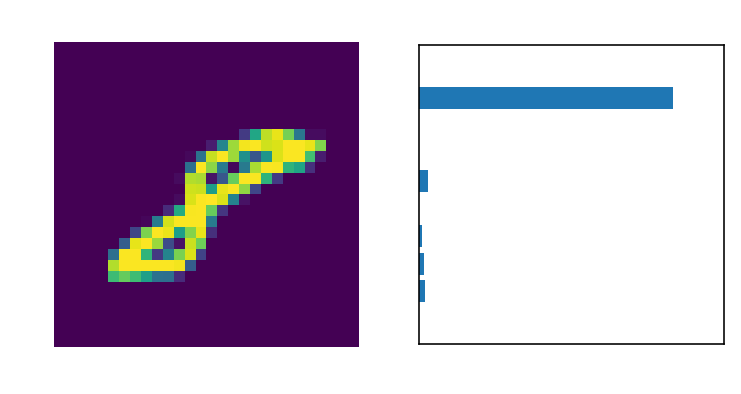

In [97]:
utils.view_classify(image.view(1,28,28), ps)